## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Input
import ast
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Data Load

In [2]:
df = pd.read_csv('/content/goodreads_data.csv')
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [3]:
jumlah_data = len(df)
print(jumlah_data)

10000


In [4]:
df.describe()

,Unnamed: 0,Avg_Rating
count,10000.00000,10000.000000
mean,4999.50000,4.068577
std,2886.89568,0.335359
min,0.00000,0.000000
25%,2499.75000,3.880000
50%,4999.50000,4.080000
75%,7499.25000,4.260000
max,9999.00000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


## PREPROCESSING

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()
df = df.dropna()

In [8]:
#  Hapus kolom 'Unnamed: 0' dan 'URL' jika ada
columns_to_drop = [col for col in ['Unnamed: 0', 'URL'] if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
#  Konversi 'Num_Ratings' dari string ke integer (hilangkan koma)
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '').astype(int)

# Lihat hasilnya
print(df.dtypes)
print(df.head())

Book            object
Author          object
Description     object
Genres          object
Avg_Rating     float64
Num_Ratings      int64
dtype: object
                                                Book         Author  \
0                              To Kill a Mockingbird     Harper Lee   
1  Harry Potter and the Philosopher’s Stone (Harr...   J.K. Rowling   
2                                Pride and Prejudice    Jane Austen   
3                          The Diary of a Young Girl     Anne Frank   
4                                        Animal Farm  George Orwell   

                                         Description  \
0  The unforgettable novel of a childhood in a sl...   
1  Harry Potter thinks he is an ordinary boy - un...   
2  Since its immediate success in 1813, Pride and...   
3  Discovered in the attic in which she spent the...   
4  Librarian's note: There is an Alternate Cover ...   

                                              Genres  Avg_Rating  Num_Ratings  
0  [

In [10]:
df.head()

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9923 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book         9923 non-null   object 
 1   Author       9923 non-null   object 
 2   Description  9923 non-null   object 
 3   Genres       9923 non-null   object 
 4   Avg_Rating   9923 non-null   float64
 5   Num_Ratings  9923 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 542.7+ KB


In [12]:
# Pastikan 'Genres' diubah dari string ke list Python
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x))

In [13]:
#  Multi-hot Encoding untuk Genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['Genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)


In [14]:

#  TF-IDF Vectorization untuk Description
# Kosongkan description yang null
df['Description'] = df['Description'].fillna('')
tfidf = TfidfVectorizer(max_features=300)  # Bisa disesuaikan jumlah fiturnya
description_tfidf = tfidf.fit_transform(df['Description'])
description_df = pd.DataFrame(description_tfidf.toarray(), columns=tfidf.get_feature_names_out())



In [15]:
#  Label Encoding untuk Author dan Book
le_author = LabelEncoder()
le_book = LabelEncoder()
df['Author_ID'] = le_author.fit_transform(df['Author'])
df['Book_ID'] = le_book.fit_transform(df['Book'])

In [16]:
# Gabungkan semua fitur jadi satu DataFrame (opsional)
df_features = pd.concat([
    df[['Book_ID', 'Author_ID', 'Avg_Rating', 'Num_Ratings']].reset_index(drop=True),
    genres_df.reset_index(drop=True),
    description_df.reset_index(drop=True)
], axis=1)

# Cek hasil akhir
print(df_features.head())

   Book_ID  Author_ID  Avg_Rating  Num_Ratings  12th Century  15th Century  \
0     8960       2094        4.27      5691311             0             0   
1     2842       2331        4.47      9278135             0             0   
2     4960       2475        4.28      3944155             0             0   
3     6714        405        4.18      3488438             0             0   
4      647       1942        3.98      3575172             0             0   

   16th Century  17th Century  18th Century  19th Century  ...    world  \
0             0             0             0             0  ...  0.00000   
1             0             0             0             0  ...  0.00000   
2             0             0             0             0  ...  0.00000   
3             0             0             0             0  ...  0.13357   
4             0             0             0             0  ...  0.00000   

   would  written      year     years  yet  york  you     young  your  
0    0.0

In [17]:
# Tampilkan 5 baris pertama sebelum normalisasi
print("Sebelum normalisasi:")
print(df[['Avg_Rating', 'Num_Ratings']].head())

Sebelum normalisasi:
   Avg_Rating  Num_Ratings
0        4.27      5691311
1        4.47      9278135
2        4.28      3944155
3        4.18      3488438
4        3.98      3575172


In [18]:
# Inisialisasi scaler
scaler = MinMaxScaler()
# Lakukan normalisasi
df[['Avg_Rating_norm', 'Num_Ratings_norm']] = scaler.fit_transform(df[['Avg_Rating', 'Num_Ratings']])

In [19]:
# Tampilkan 5 baris pertama setelah normalisasi
print("\nSetelah normalisasi:")
print(df[['Avg_Rating_norm', 'Num_Ratings_norm']].head())


Setelah normalisasi:
   Avg_Rating_norm  Num_Ratings_norm
0            0.854          0.613411
1            0.894          1.000000
2            0.856          0.425102
3            0.836          0.375985
4            0.796          0.385333


In [20]:
# Genre: multi-hot encoding ----------
# Jika sudah list, cukup bersihkan isi list
df['Genres'] = df['Genres'].apply(lambda x: [genre.strip() for genre in x] if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['Genres'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

In [21]:
#  Deskripsi buku: TF-IDF ----------
df['Description'] = df['Description'].fillna('')
tfidf = TfidfVectorizer(max_features=100)
desc_tfidf = tfidf.fit_transform(df['Description']).toarray()
desc_df = pd.DataFrame(desc_tfidf, columns=tfidf.get_feature_names_out())

In [22]:
# Gabungkan semua fitur ----------
final_features = pd.concat([df[['Avg_Rating_norm']].reset_index(drop=True),
                            genre_df.reset_index(drop=True),
                            desc_df.reset_index(drop=True)], axis=1)

print("Shape fitur akhir:", final_features.shape)
print("Contoh 5 baris fitur:\n", final_features.head())

Shape fitur akhir: (9923, 718)
Contoh 5 baris fitur:
    Avg_Rating_norm  12th Century  15th Century  16th Century  17th Century  \
0            0.854             0             0             0             0   
1            0.894             0             0             0             0   
2            0.856             0             0             0             0   
3            0.836             0             0             0             0   
4            0.796             0             0             0             0   

   18th Century  19th Century  20th Century  21st Century  Abuse  ...  who  \
0             0             0             0             0      0  ...  0.0   
1             0             0             0             0      0  ...  0.0   
2             0             0             0             0      0  ...  0.0   
3             0             0             0             0      0  ...  0.0   
4             0             0             0             0      0  ...  0.0   

   will 

## MODELLING

In [23]:
X = final_features.values
print("Shape input ke model:", X.shape)

Shape input ke model: (9923, 718)


In [24]:
input_layer = Input(shape=(X.shape[1],), name="input_layer")

# Encoder
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
embedding = Dense(32, activation='relu', name="embedding_output")(x)

# Decoder
x = Dense(64, activation='relu')(embedding)
x = Dense(128, activation='relu')(x)
output_layer = Dense(X.shape[1], activation='linear')(x)  # Output shape sama seperti input

# Bangun model autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 718)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        92,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_output (Dense)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 718)            │        92,622 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,422 (802.43 KB)

 Trainable params: 205,422 (802.43 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
autoencoder.fit(X, X, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0078 - val_loss: 0.0032
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 10/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 11/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 12/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

## TESTING

In [27]:
book_embeddings = autoencoder.predict(X)
# Contoh: Lihat vektor embedding buku pertama
print("Vektor embedding buku ke-0:\n", book_embeddings[0])

311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Vektor embedding buku ke-0:
 [ 7.86387384e-01 -3.29821417e-03 -2.09860317e-03  9.03295167e-03
 -9.52690654e-03  6.00983948e-02 -4.11526449e-02 -9.70431045e-03
 -8.55300203e-03  1.09936669e-02  1.39150815e-03 -3.20690498e-03
  1.33759715e-02 -6.62133237e-03  1.92986056e-03  8.31549522e-04
 -1.60754528e-02  2.72105988e-02  5.61191551e-02  4.79090624e-02
  3.24328393e-02 -1.14309695e-03 -2.55911052e-03  7.02632591e-04
 -2.35017203e-03  1.62083516e-03  2.98909936e-03  3.56377591e-03
  2.40539270e-03 -2.55415402e-03  1.60350129e-02 -2.93494295e-03
  1.06454790e-02 -5.91554493e-03  2.37444602e-03  2.88345083e-03
  3.81314568e-03  7.45526515e-04  8.00970290e-03 -4.35255934e-03
  1.60723459e-02 -3.96337640e-03 -2.96326261e-02  1.24225765e-03
  7.43474811e-05 -1.44639891e-03  1.43558756e-02  9.54183750e-04
 -3.18980776e-04  3.08622476e-02 -2.00852333e-03 -4.02434729e-03
  4.11205553e-03  1.43836299e-03  5.76154701e-03  4.16636877e-02
 -1.16510121e-02 -1.

In [28]:
# Hitung cosine similarity antar semua buku
similarity_matrix = cosine_similarity(book_embeddings)

# Pilih indeks buku sebagai referensi
book_idx = 100

# Cari top 5 buku mirip (selain dirinya sendiri)
similar_scores = list(enumerate(similarity_matrix[book_idx]))
similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:6]  # Skip dirinya sendiri

print(f"Top 5 buku mirip dengan buku ke-{book_idx}:")
print(f"Judul Referensi: {df.iloc[book_idx]['Book']}")
print(f"Genre Referensi: {df.iloc[book_idx]['Genres']}\n")

for idx, score in similar_scores:
    title = df.iloc[idx]['Book']
    genres = df.iloc[idx]['Genres']
    print(f"- Judul: {title}")
    print(f"  Genre: {genres}")
    print(f"  Akurasi Kemiripan: {score:.4f}\n")

Top 5 buku mirip dengan buku ke-100:
Judul Referensi: The Da Vinci Code (Robert Langdon, #2)
Genre Referensi: ['Fiction', 'Mystery', 'Thriller', 'Mystery Thriller', 'Historical Fiction', 'Suspense', 'Adventure']

- Judul: The Templar Legacy (Cotton Malone, #1)
  Genre: ['Fiction', 'Thriller', 'Mystery', 'Historical Fiction', 'Adventure', 'Mystery Thriller', 'Suspense']
  Akurasi Kemiripan: 0.9992

- Judul: Inferno (Robert Langdon, #4)
  Genre: ['Fiction', 'Thriller', 'Mystery', 'Mystery Thriller', 'Historical Fiction', 'Suspense', 'Adventure']
  Akurasi Kemiripan: 0.9991

- Judul: The Venetian Betrayal (Cotton Malone, #3)
  Genre: ['Thriller', 'Fiction', 'Mystery', 'Historical Fiction', 'Adventure', 'Suspense', 'Mystery Thriller']
  Akurasi Kemiripan: 0.9991

- Judul: The Alexandria Link (Cotton Malone, #2)
  Genre: ['Fiction', 'Thriller', 'Mystery', 'Historical Fiction', 'Adventure', 'Mystery Thriller', 'Suspense']
  Akurasi Kemiripan: 0.9990

- Judul: The Charlemagne Pursuit (Cotton 

## VISUALISASI

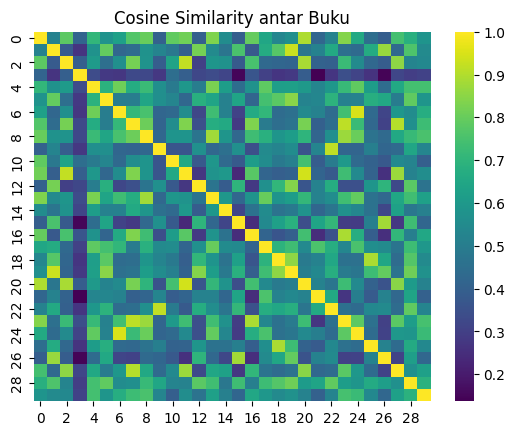

In [29]:
sns.heatmap(similarity_matrix[:30, :30], cmap='viridis')  # subset 30 buku agar tidak terlalu besar
plt.title("Cosine Similarity antar Buku")
plt.show()

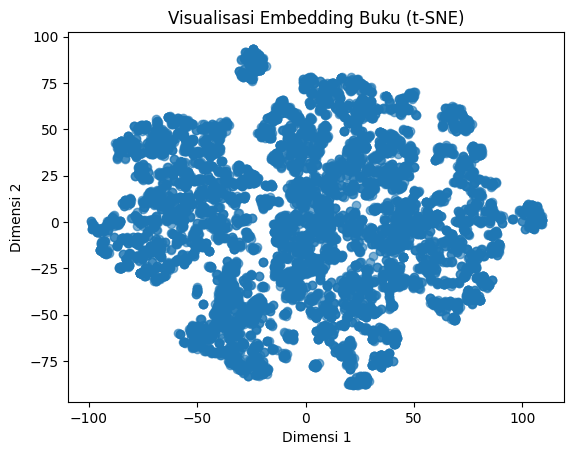

In [30]:
tsne = TSNE(n_components=2, random_state=42)
embed_2d = tsne.fit_transform(book_embeddings)

plt.scatter(embed_2d[:, 0], embed_2d[:, 1], alpha=0.6)
plt.title("Visualisasi Embedding Buku (t-SNE)")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.show()